# Short Summary of Notebook;(Part 1, Part 2, Part 3): Sample methods

1. Required Libraries
2. Dataset Quick Overview & Pre-Processing
3. Features generation/ Feature Engineerings
4. Distribution of Features
5. Correlation Analysis
6. Candle stick chart on Bitcoin historical data
7. Time series analysis and prediction using prophet
8. Regression analysis using pycaret
9. LSTM model using Keras library
10. Arima model using Sklearn library

Deatils; https://github.com/sohel-ccse?tab=projects

In [1]:
#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#garbage collector - To free up unused space
import gc
gc.collect()

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

#Time -To find how long each cell takes to run
import time

# Part 1

In [3]:
#Importing of Data 
data=pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [4]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(4857377, 8)

Data types of data columns: 
Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


Data Pre-processing steps
1. Date - We need to convert the Hourly data to Daily based data

2. Fill in the missing values interpolation

In [5]:
data['Timestamp'] = [datetime.fromtimestamp(x) for x in data['Timestamp']]
data = data.set_index('Timestamp')
data = data.resample("24H").mean()
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


Missing values cheacking

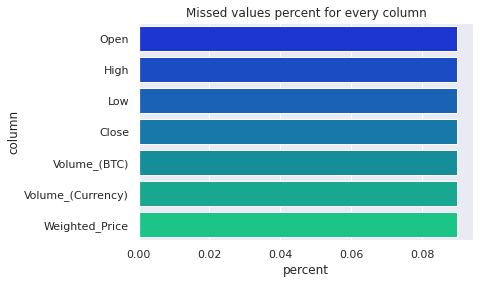

In [6]:
missed = pd.DataFrame()
missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal',palette="winter"
).set_title('Missed values percent for every column')

Let's interpolate to fill in the missing values

In [7]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    
    df['Close'] = df['Close'].interpolate()
    
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    
    df['High'] = df['High'].interpolate()
    
    df['Low'] = df['Low'].interpolate()
    
    print(f'{m_}No. of Missing values after interpolation:\n{y_}{df.isnull().sum()}')
    
fill_missing(data)

No. of Missing values after interpolation:
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [8]:
data.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000
mean,4601.806064,4605.075091,4598.384241,4601.801749,10.380683,31772.412824,4601.737823
std,8204.624470,8211.131356,8197.930313,8204.733871,8.935927,62729.180701,8204.397384
min,4.331667,4.331667,4.331667,4.331667,0.250000,1.227500,4.331667
25%,245.055994,245.140770,244.958257,245.053001,4.673068,1916.660938,245.040671
50%,694.424661,695.214669,693.958000,694.489355,7.632095,6835.712575,694.373861
75%,7241.470296,7247.256589,7237.584015,7241.334351,13.148682,36034.425656,7241.627658
max,60458.339735,60488.868334,60426.441554,60458.888892,119.522868,950995.602917,60455.844831


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3379 entries, 2011-12-31 to 2021-03-31
Freq: 24H
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3379 non-null   float64
 1   High               3379 non-null   float64
 2   Low                3379 non-null   float64
 3   Close              3379 non-null   float64
 4   Volume_(BTC)       3379 non-null   float64
 5   Volume_(Currency)  3379 non-null   float64
 6   Weighted_Price     3379 non-null   float64
dtypes: float64(7)
memory usage: 211.2 KB


Feature Generation

In [10]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [11]:
new_df=data.groupby('Timestamp').mean()
new_df=new_df[['Volume_(BTC)', 'Close','Volume_(Currency)']]
new_df.rename(columns={'Volume_(BTC)':'Volume_market_mean','Close':'close_mean','Volume_(Currency)':'volume_curr_mean'},inplace=True)
new_df.head()

,Volume_market_mean,close_mean,volume_curr_mean
Timestamp,,,
2011-12-31,23.829470,4.482500,106.330084
2012-01-01,7.200667,4.806667,35.259720
2012-01-02,19.048000,5.000000,95.240000
2012-01-03,11.004660,5.252500,58.100651
2012-01-04,11.914807,5.223333,63.119577


In [12]:
data_df = data.merge(new_df, left_on='Timestamp',
                                right_index=True)
data_df['volume(BTC)/Volume_market_mean'] = data_df['Volume_(BTC)'] / data_df['Volume_market_mean']
data_df['Volume_(Currency)/volume_curr_mean'] = data_df['Volume_(Currency)'] / data_df['volume_curr_mean']

data_df['close/close_market_mean'] = data_df['Close'] / data_df['close_mean']
data_df['open/close'] = data_df['Open'] / data_df['Close']
data_df["gap"] = data_df["High"] - data_df["Low"] 
data_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volume_market_mean,close_mean,volume_curr_mean,volume(BTC)/Volume_market_mean,Volume_(Currency)/volume_curr_mean,close/close_market_mean,open/close,gap
Timestamp,,,,,,,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,23.829470,4.482500,106.330084,1.0,1.0,1.0,0.996096,0.017500
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,7.200667,4.806667,35.259720,1.0,1.0,1.0,1.000000,0.000000
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,19.048000,5.000000,95.240000,1.0,1.0,1.0,1.000000,0.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,11.004660,5.252500,58.100651,1.0,1.0,1.0,1.000000,0.000000
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,11.914807,5.223333,63.119577,1.0,1.0,1.0,0.995533,0.023333


Sometimes, the data set might be too huge to process, since we are using dataframe. To make sure we dont hold up too much RAM. We could try other approaches like

1. use gc.collect() - collects all the garbage values

2. del dataframe - free up some space by deleting the unused dataframe using the del command

3. Reduce the memory usage based on the data types of the columns in the dataframe(shown below)

In [13]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(f'{m_}Memory of the dataframe:\n{y_}{mem_usage(data_df)}')

Memory of the dataframe:
0.41 MB


In [14]:
#All the columns in float64 format, we can downsize them to float32 to reduce memory usage 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3379 entries, 2011-12-31 to 2021-03-31
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Open                                3379 non-null   float64
 1   High                                3379 non-null   float64
 2   Low                                 3379 non-null   float64
 3   Close                               3379 non-null   float64
 4   Volume_(BTC)                        3379 non-null   float64
 5   Volume_(Currency)                   3379 non-null   float64
 6   Weighted_Price                      3379 non-null   float64
 7   Volume_market_mean                  3379 non-null   float64
 8   close_mean                          3379 non-null   float64
 9   volume_curr_mean                    3379 non-null   float64
 10  volume(BTC)/Volume_market_mean      3379 non-null   float64
 11  Volume_(Currency)/volume_

We can use the function pd.to_numeric() to downcast our float types. 
We’ll use DataFrame.select_dtypes to select only the float columns,
then we’ll optimize the types and compare the memory usage.

In [15]:
gl_float = data_df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['Before','After']
compare_floats.apply(pd.Series.value_counts)

,Before,After
float32,NaN,15.0
float64,15.0,NaN


In [16]:
print(f"{m_}Before float conversion:\n{y_}{mem_usage(data_df)}")
data_df[converted_float.columns] = converted_float
print(f"{m_}After float conversion:\n{y_}{mem_usage(data_df)}")

Before float conversion:
0.41 MB
After float conversion:
0.22 MB


We have successfully reduced the size of the dataframe by 50%. 
Eventhough, the size of the dataframe used here is small in this analysis.
It's always a good aprroach to reduce the memory usage

Distribution of Features

Let's Visualize the distribution of the key variables
like Opening price, Highest price, Lowest price and Volume in Bitcoin

In [17]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,15),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

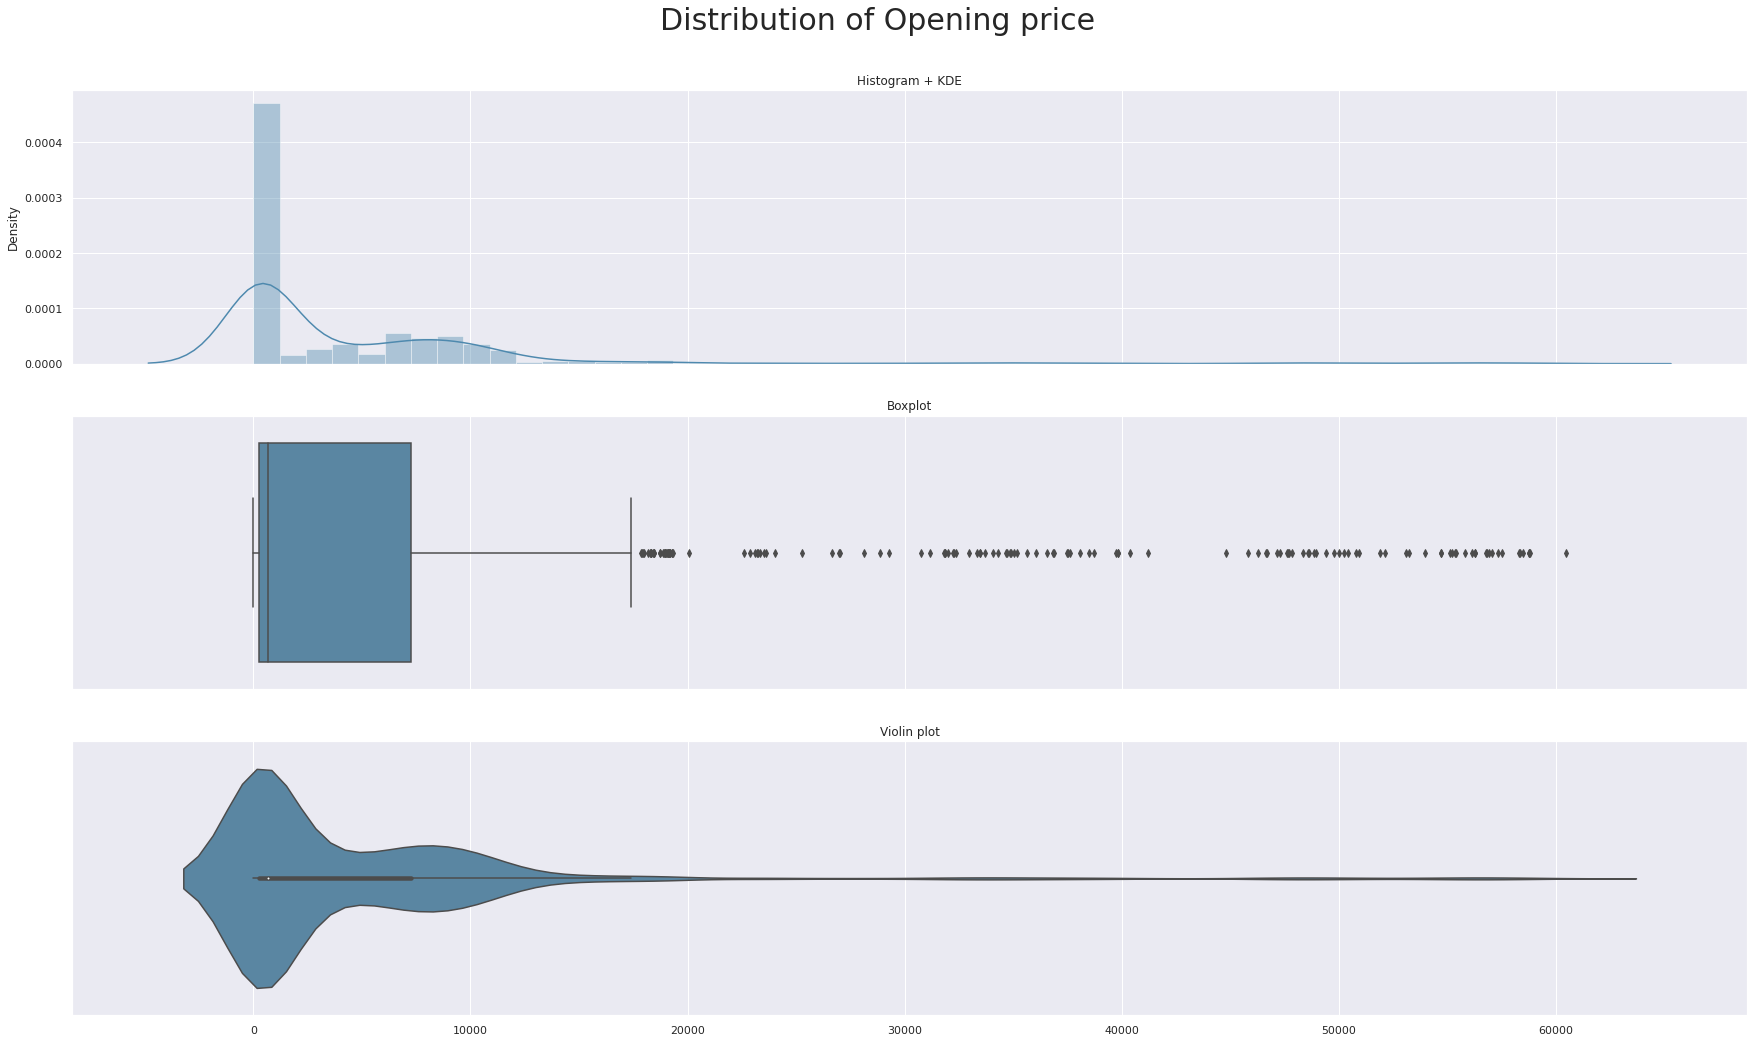

In [18]:
triple_plot(data['Open'],'Distribution of Opening price',custom_colors[0])

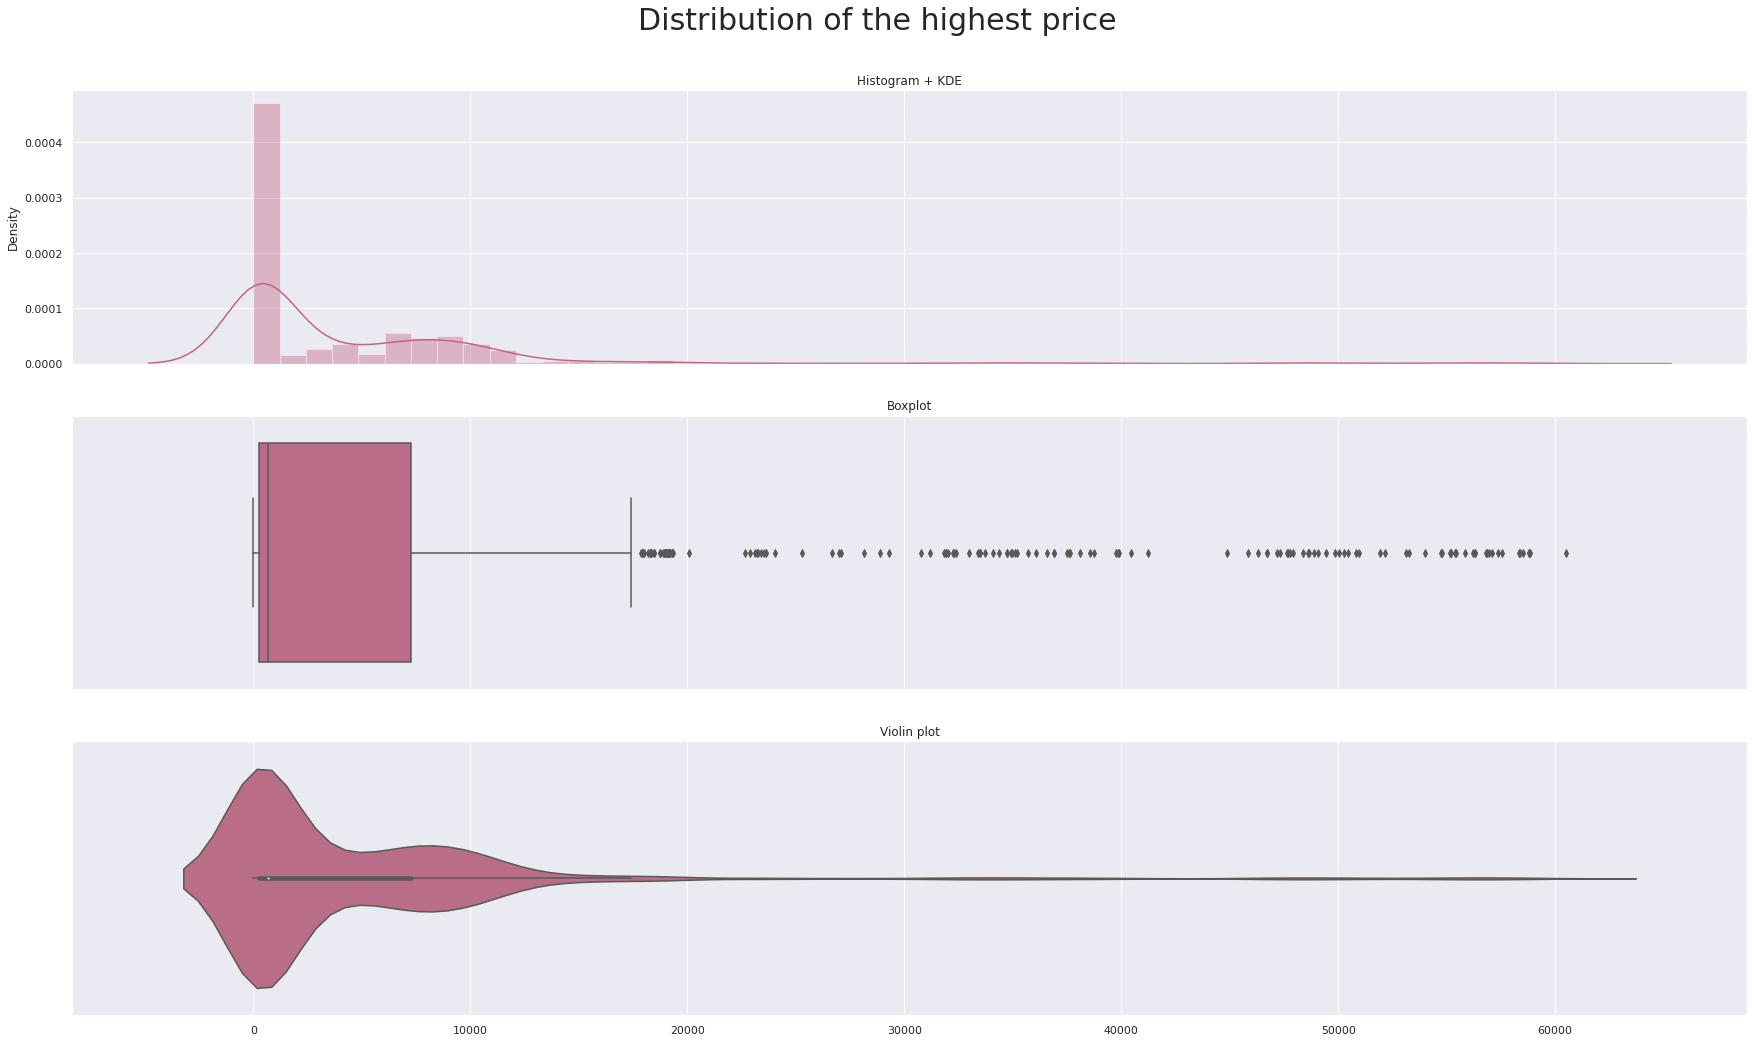

In [19]:
triple_plot(data['High'],'Distribution of the highest price',custom_colors[1])

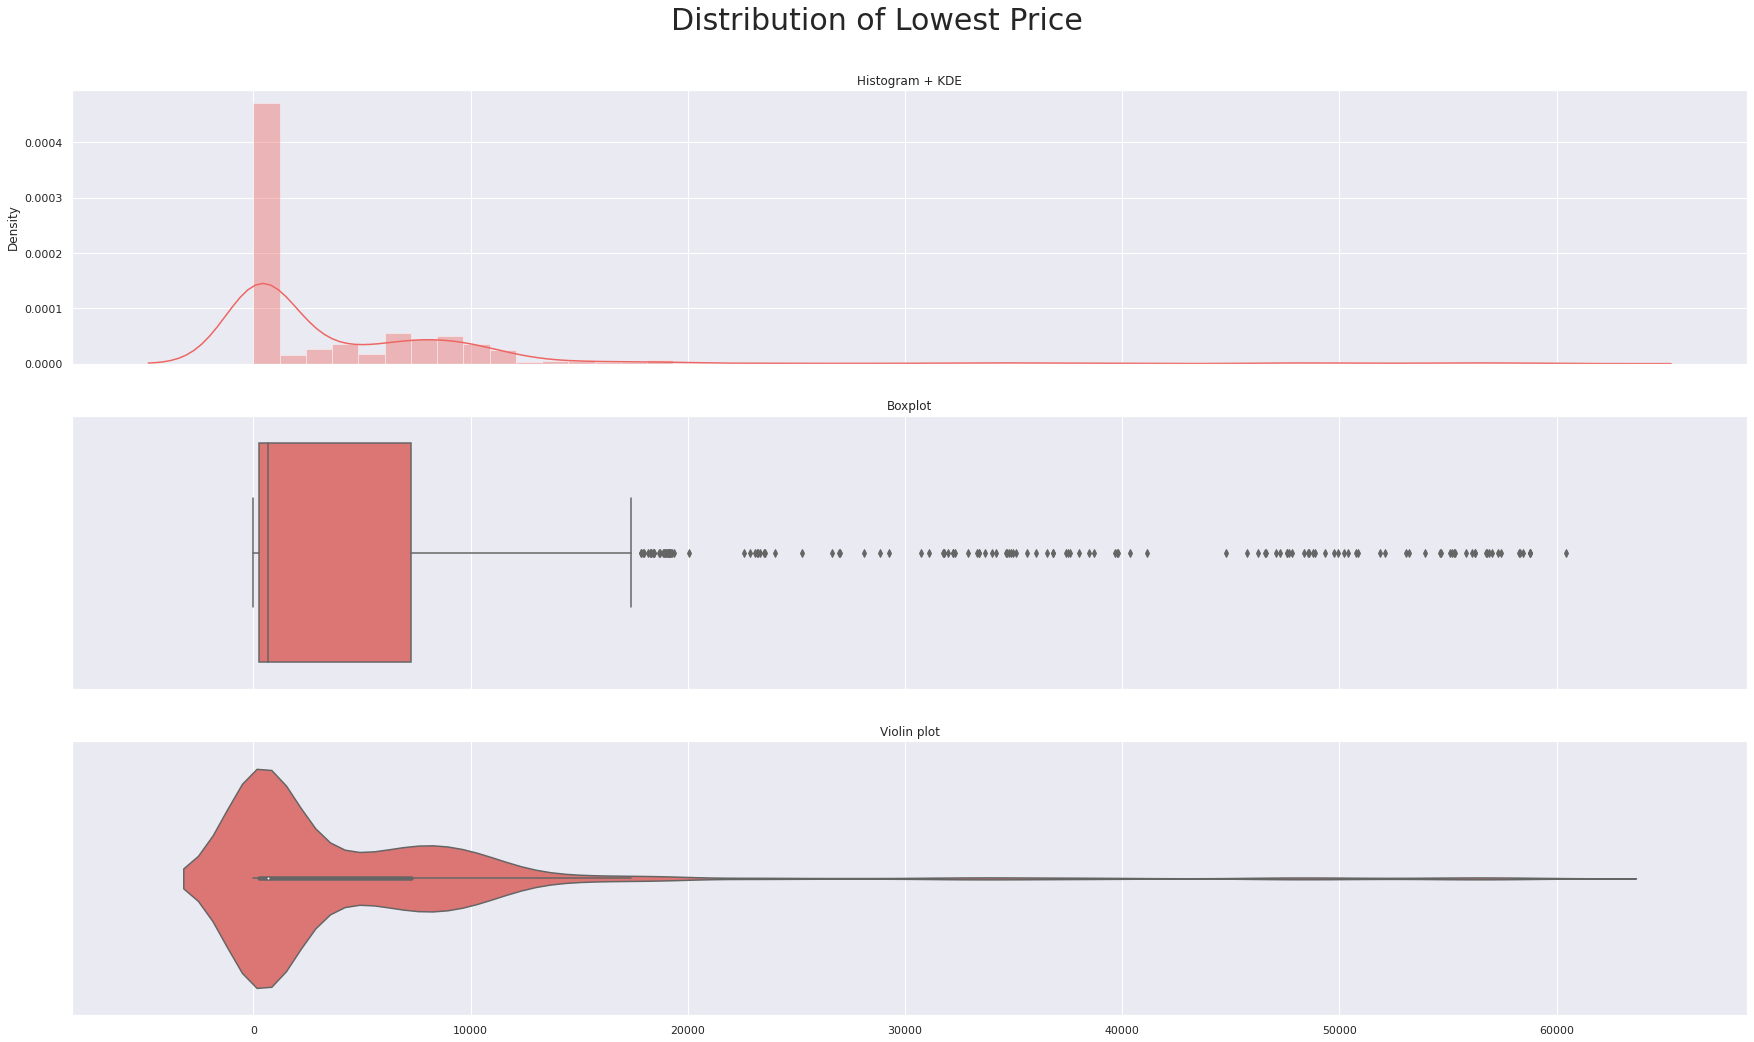

In [20]:
triple_plot(data['Low'],'Distribution of Lowest Price',custom_colors[2])

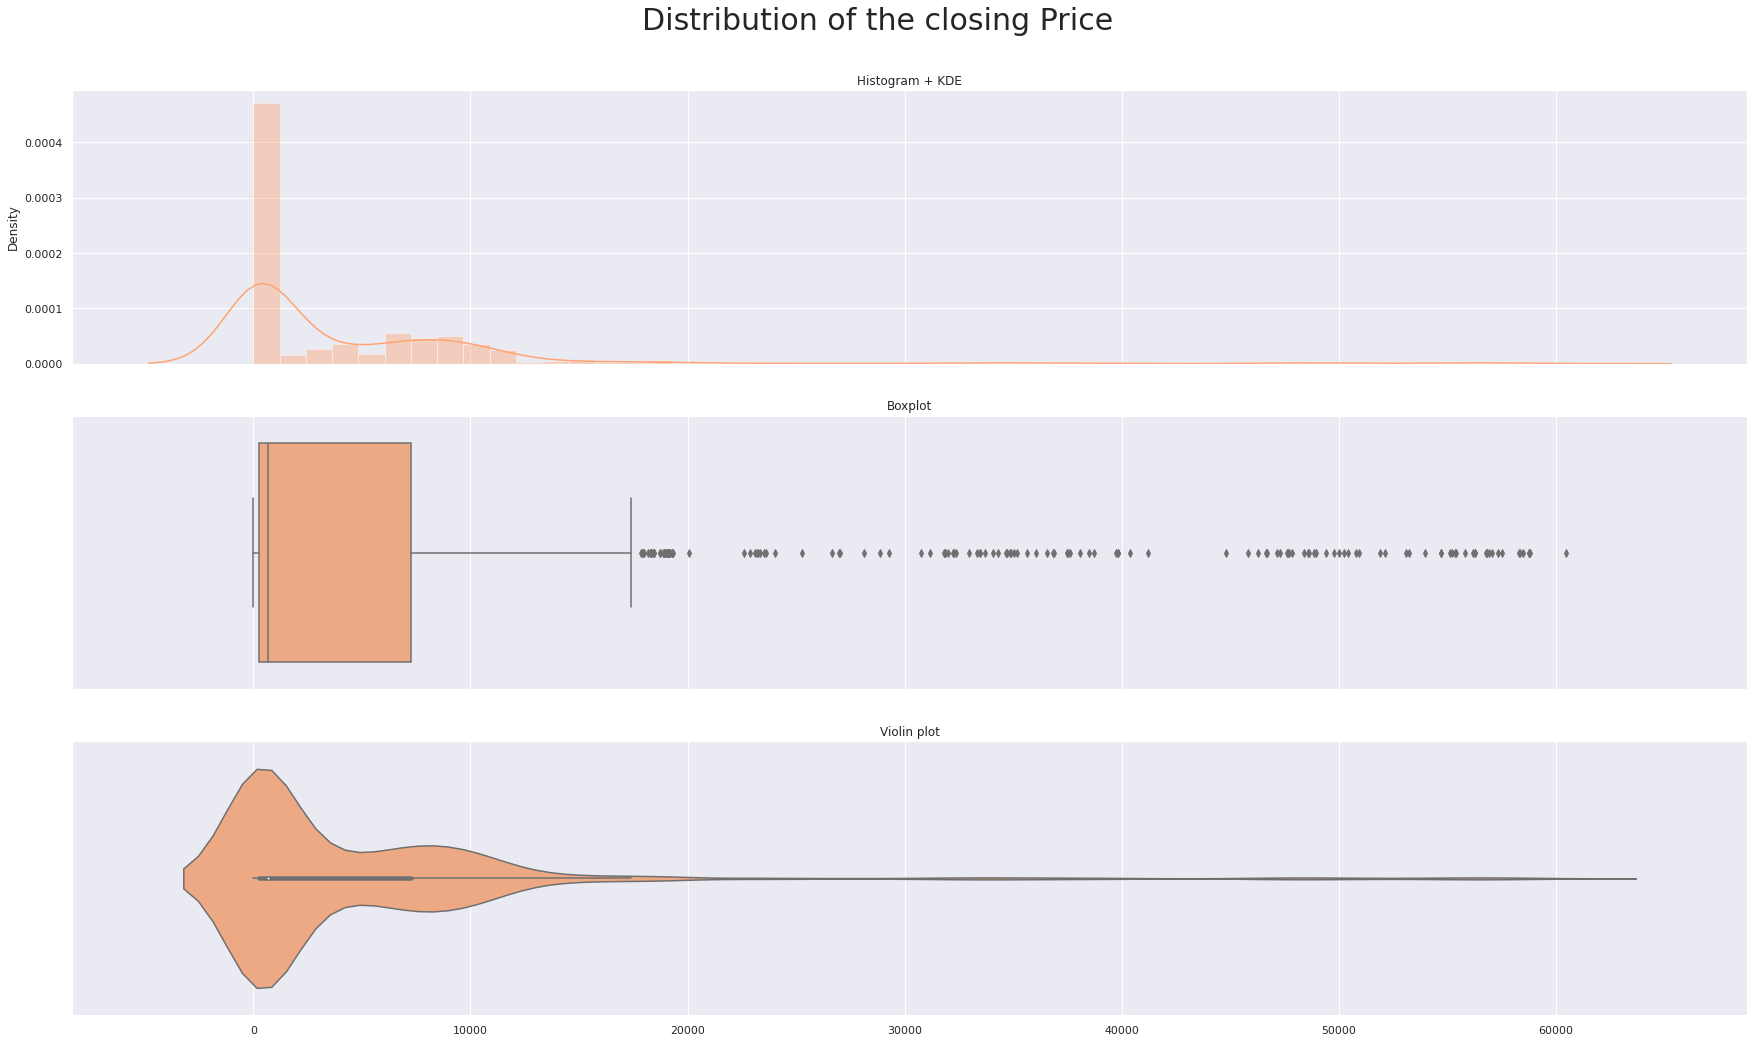

In [21]:
triple_plot(data['Close'],'Distribution of the closing Price',custom_colors[3])

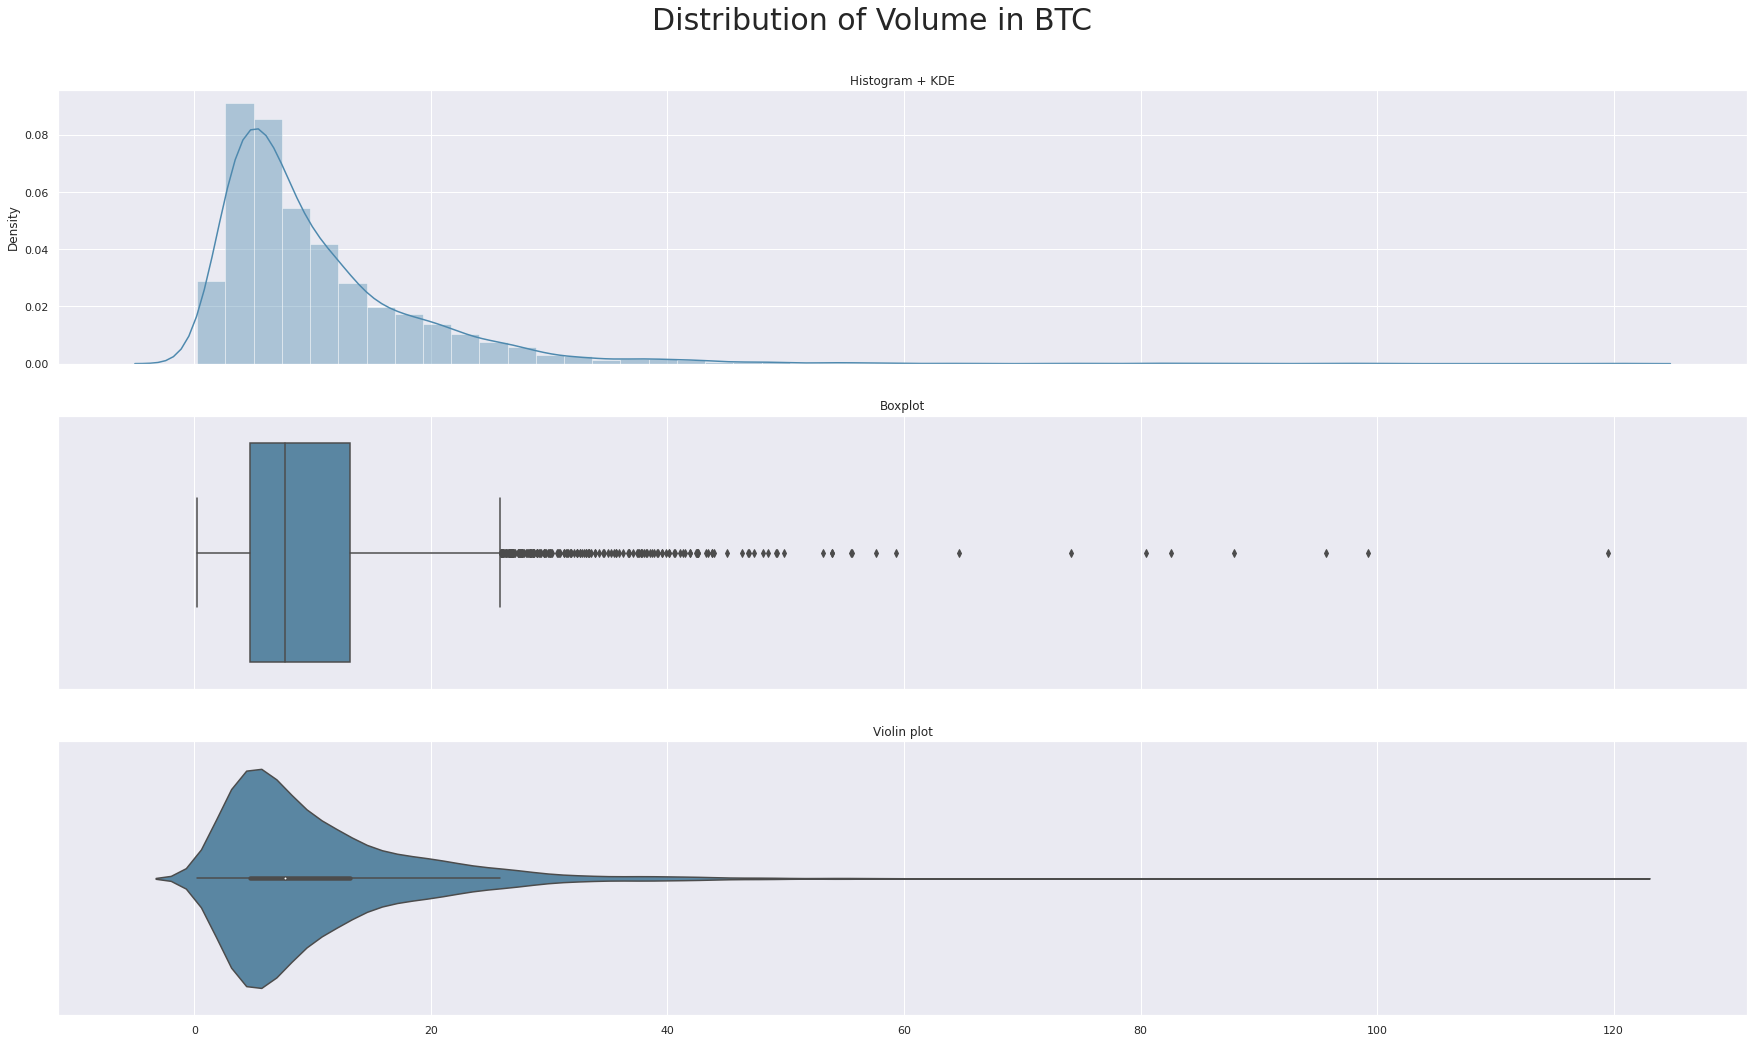

In [22]:
triple_plot(data['Volume_(BTC)'],'Distribution of Volume in BTC ',custom_colors[0])

# Correlation Analysis

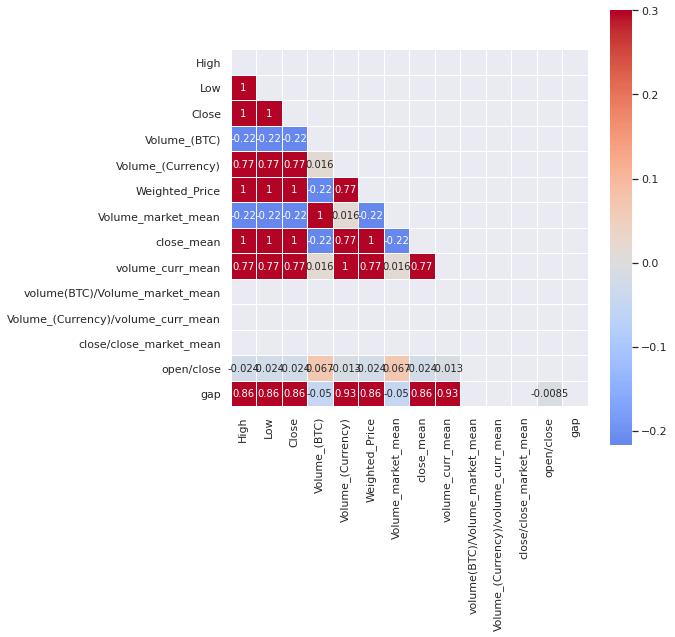

In [23]:
plt.figure(figsize=(8,8))
corr=data_df[data_df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data_df[data_df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [24]:
data_df=data_df.drop(columns=['volume(BTC)/Volume_market_mean','Volume_(Currency)/volume_curr_mean','close/close_market_mean'])
data_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'Volume_market_mean', 'close_mean',
       'volume_curr_mean', 'open/close', 'gap'],
      dtype='object')

# Correlation Network

In [25]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])

In [26]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(9,9))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

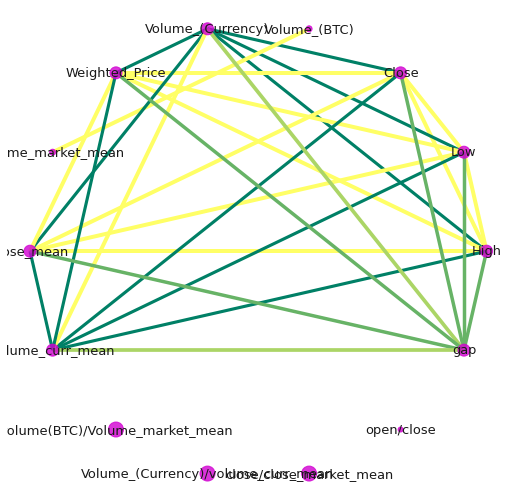

In [27]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

In [28]:
trace1 = {
    'x': data_df.index,
    'open': data_df.Open,
    'close': data_df.Close,
    'high': data_df.High,
    'low': data_df.Low,
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}
# Calculate and define moving average of 30 periods
avg_30 = data_df.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = data_df.Close.rolling(window=50, min_periods=1).mean()

trace2 = {
    'x': data_df.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

trace3 = {
    'x': data_df.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}
data_trace = [trace1, trace2, trace3]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Bitcoin Moving Averages',
        'font': {
            'size': 15
        } 
    }
})




fig = go.Figure(data=data_trace, layout=layout)
fig.write_html("Bitcoin Moving Averages.html")
fig.show()

In [29]:
data_df.reset_index(inplace=True)
data_df['month']=data_df['Timestamp'].dt.month
layout = go.Layout({
    'title': {
        'text': 'Bitcoin Price - Monthly',
        'font': {
            'size': 15
        } 
    }
})

fig = go.Figure(data=[go.Candlestick(x=data_df['month'],
                open=data_df['Open'], high=data_df['High'],
                low=data_df['Low'], close=data_df['Weighted_Price'])
                      ],layout=layout)
fig.show()

What is Prophet in AI?
Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.
Advantages of using Prophet
1. Accommodates seasonality with multiple periods
2. Prophet is resilient to missing values
3. Best way to handle outliers in Prophet is to remove them
4. Fitting of the model is fast
5. Intuitive hyper parameters which are easy to tune

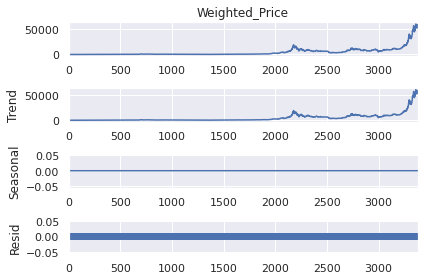

<Figure size 1080x864 with 0 Axes>

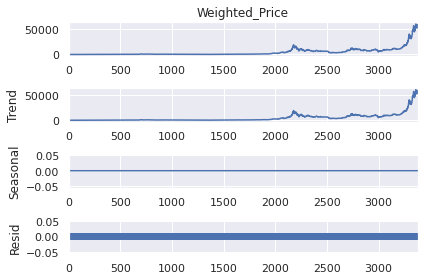

In [30]:
plt.figure(figsize=(15,12))
series = data_df.Weighted_Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

Input to Prophet is a data frame with minimum two columns : ds and y

In [31]:
# Renaming the column names accroding to Prophet's requirements
prophet_df=data_df[['Timestamp','Weighted_Price']]
prophet_df.rename(columns={'Timestamp':'ds','Weighted_Price':'y'},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Creating and fitting the Prophet model with default values

In [32]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

Predicting the values for the future

In [33]:
future= prophet_basic.make_future_dataframe(periods=365)#Making predictions for one year
future.tail(10)

,ds
3734,2022-03-22
3735,2022-03-23
3736,2022-03-24
3737,2022-03-25
3738,2022-03-26
3739,2022-03-27
3740,2022-03-28
3741,2022-03-29
3742,2022-03-30
3743,2022-03-31


In [34]:
forecast=prophet_basic.predict(future)

Plotting the predicted data

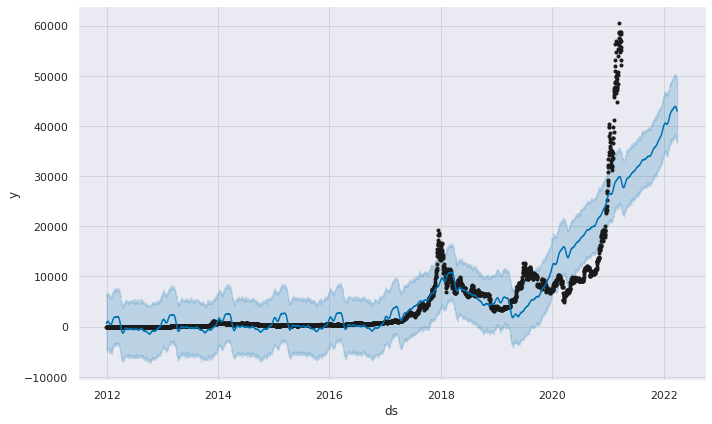

In [35]:
fig1 =prophet_basic.plot(forecast)

Plotting the Forecasted components(Trend and Seasonality)

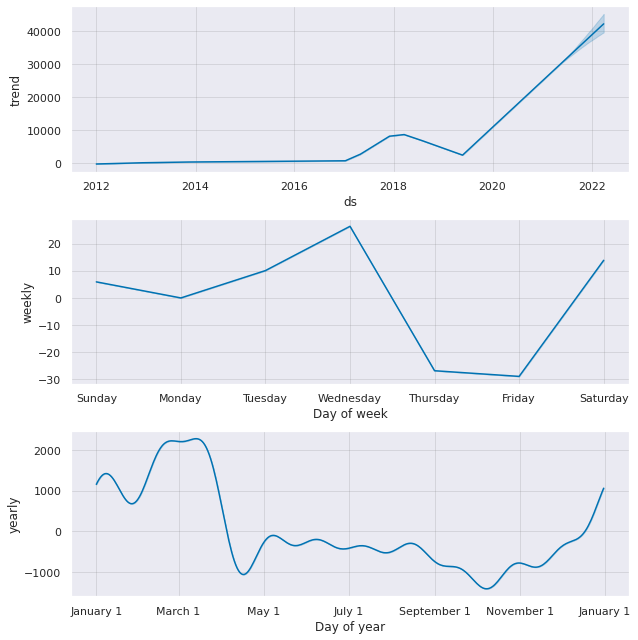

In [36]:
fig1 = prophet_basic.plot_components(forecast)

Adding ChangePoints to Prophet
Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred

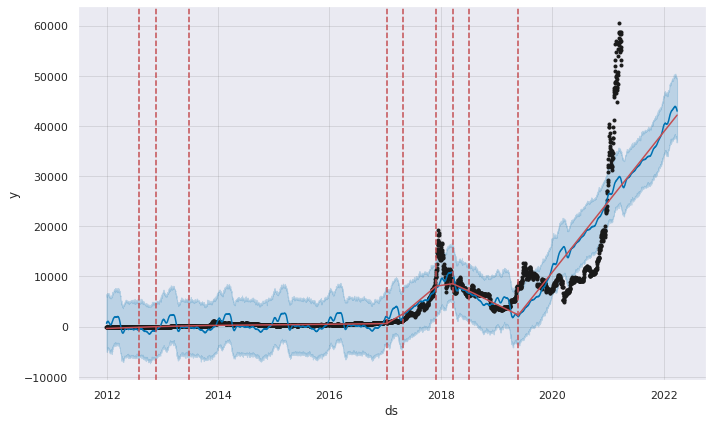

In [37]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [38]:
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

Change points:
 108    2012-04-17
216    2012-08-03
324    2012-11-19
432    2013-03-07
540    2013-06-23
648    2013-10-09
757    2014-01-26
865    2014-05-14
973    2014-08-30
1081   2014-12-16
1189   2015-04-03
1297   2015-07-20
1405   2015-11-05
1513   2016-02-21
1621   2016-06-08
1729   2016-09-24
1837   2017-01-10
1945   2017-04-28
2054   2017-08-15
2162   2017-12-01
2270   2018-03-19
2378   2018-07-05
2486   2018-10-21
2594   2019-02-06
2702   2019-05-25
Name: ds, dtype: datetime64[ns]



Adding Multiple Regressors
Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes.
Creating fitting and predicting dataset with additional regressors

In [39]:
data_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'Volume_market_mean',
       'close_mean', 'volume_curr_mean', 'open/close', 'gap', 'month'],
      dtype='object')

In [40]:
prophet_df['Open'] = data_df['Open']
prophet_df['High'] = data_df['High']
prophet_df['Low'] = data_df['Low']
prophet_df['Vol(BTC)'] = data_df['Volume_(BTC)']
prophet_df['Vol(curr)'] = data_df['Volume_(Currency)']
prophet_df['Volume_market_mean'] = data_df['Volume_market_mean']
prophet_df['close_mean'] = data_df['close_mean']
prophet_df['volume_curr_mean'] = data_df['volume_curr_mean']
prophet_df['open/close'] = data_df['open/close']
prophet_df['gap'] = data_df['gap']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [41]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol(BTC)')
pro_regressor.add_regressor('Vol(curr)')
pro_regressor.add_regressor('Volume_market_mean')
pro_regressor.add_regressor('close_mean')
pro_regressor.add_regressor('volume_curr_mean')
pro_regressor.add_regressor('open/close')
pro_regressor.add_regressor('gap')

In [42]:
train_X= prophet_df[:2500]
test_X= prophet_df[2500:]

In [43]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

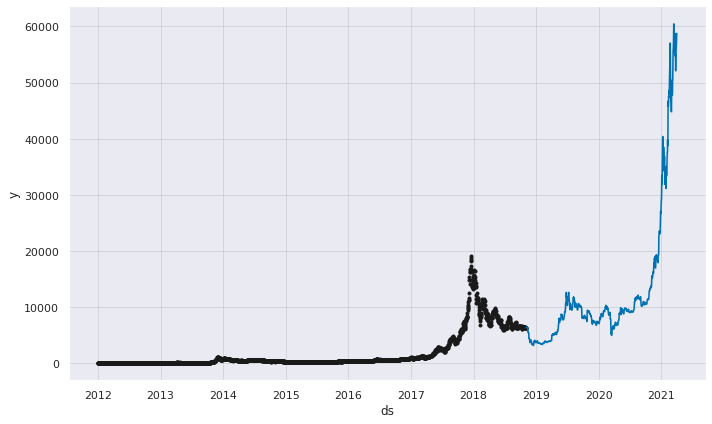

In [44]:
#Forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

6 different types of metrics are shown by each time horizon, 
but by taking moving average over 37 days in this case (can be changed by ‘rolling_window’ option).

  0%|          | 0/12 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.284021,0.532936,0.211707,0.002306,0.000147,0.705479
1,38 days,0.319568,0.565303,0.225020,0.002537,0.000150,0.700913
2,39 days,0.363281,0.602728,0.240694,0.002785,0.000164,0.696347
3,40 days,0.409700,0.640078,0.256775,0.003045,0.000169,0.691781
4,41 days,0.455634,0.675007,0.272013,0.003309,0.000178,0.688356


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,17.675202,4.204189,2.012612,0.006351,0.000539,0.820776
325,362 days,17.695587,4.206612,2.015720,0.006341,0.000538,0.821918
326,363 days,17.716375,4.209082,2.019502,0.006332,0.000536,0.821918
327,364 days,17.738625,4.211725,2.022788,0.006321,0.000536,0.821918
328,365 days,17.755441,4.213721,2.025203,0.006309,0.000536,0.819635


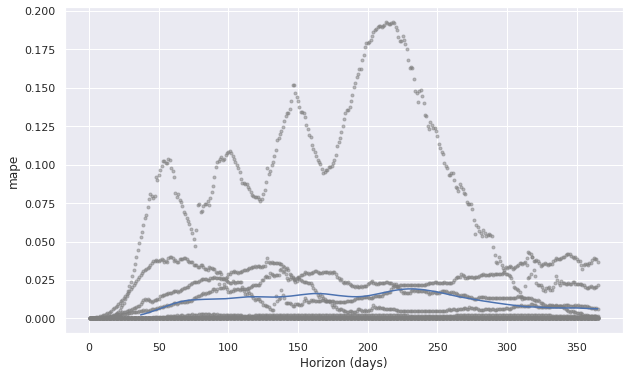

In [45]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

MAPE
The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error

Many organizations focus primarily on the MAPE when assessing forecast accuracy. Most people are comfortable thinking in percentage terms, making the MAPE easy to interpret. It can also convey information when you don’t know the item’s demand volume. For example, telling your manager, "we were off by less than 4%" is more meaningful than saying "we were off by 3,000 cases," if your manager doesn’t know an item’s typical demand volume.

What Prophet doesnt do
1.Prophet does not allow non-Gaussian noise distribution:
In Prophet, noise distribution is always Gaussian and pre-transformation of y values is the only way to handle the values following skewed distribution.

2. Prophet does not take autocorrelation on residual into account
Since epsilon noise portion in the formula assume i.i.d. normal distribution, the residual is not assumed to have autocorrelation, unlike ARIMA model.

3. Prophet does not assume stochastic trend
Prophet’s trend component is always deterministic+possible changepoints and it won’t assume stochastic trend unlike ARIMA.

Prediction using Pycaret

In [46]:
!pip install pycaret

     |████████████████████████████████| 261 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 47.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 55.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 50.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 47.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 44.5 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=4fa5dabacc149f32c7b0144b022538f7eb3cbc3f9591a0edb21c

PyCaret’s Regression Module

PyCaret’s Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the ‘outcome variable’, or ‘target’) and one or more independent variables (often called ‘features’, ‘predictors’, or ‘covariates’).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. This module provides several pre-processing features that prepare the data for modeling through the setup function. It has over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

In [47]:
data_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'Volume_market_mean',
       'close_mean', 'volume_curr_mean', 'open/close', 'gap', 'month'],
      dtype='object')

In [48]:
data_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Volume_market_mean,close_mean,volume_curr_mean,open/close,gap,month
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330086,4.471603,23.829470,4.482500,106.330086,0.996096,0.017500,12
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,7.200667,4.806667,35.259720,1.000000,0.000000,1
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.239998,5.000000,19.048000,5.000000,95.239998,1.000000,0.000000,1
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,11.004660,5.252500,58.100651,1.000000,0.000000,1
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914806,63.119579,5.208159,11.914806,5.223333,63.119579,0.995533,0.023333,1


In [49]:
%%time
from pycaret.regression import *
data_df.set_index('Timestamp',inplace=True)
exp_name = setup(data=data_df,target="Weighted_Price",silent=True)
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.3188,0.3839,0.5966,1.0000,0.0061,0.0021,0.3030
par,Passive Aggressive Regressor,0.4244,1.1194,1.0159,1.0000,0.0016,0.0005,0.0170
llar,Lasso Least Angle Regression,29.0192,2156.9896,45.7374,1.0000,0.4857,0.4648,0.0150
lasso,Lasso Regression,0.3353,0.4034,0.6203,1.0000,0.0065,0.0028,0.0140
br,Bayesian Ridge,0.3184,0.3835,0.5963,1.0000,0.0061,0.0021,0.0140
huber,Huber Regressor,0.2730,0.4218,0.6189,1.0000,0.0024,0.0009,0.0510
ridge,Ridge Regression,0.3192,0.3837,0.5967,1.0000,0.0062,0.0021,0.0130
lar,Least Angle Regression,0.3198,0.3813,0.5944,1.0000,0.0091,0.0026,0.0170
en,Elastic Net,0.3253,0.4070,0.6191,1.0000,0.0053,0.0022,0.0150
omp,Orthogonal Matching Pursuit,0.3315,0.4145,0.6323,1.0000,0.0055,0.0024,0.0140


CPU times: user 11.2 s, sys: 827 ms, total: 12 s
Wall time: 1min 30s


# Part 2; using LSTM-Deep learning models 

In [50]:
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.shape

(4857377, 8)

In [52]:
df.dropna(axis=0,how='any',inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [53]:
df.shape

(3613769, 8)

In [54]:
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df.set_index(['Timestamp'])

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [55]:
df.isnull().values.any()

False

Now I am selecting only those rows from where the 'Weighted_Price' is 
greater than 2500 because before the price 2500 the data was almost
stationary and it would effect the model performance.

In [56]:
df = df.loc[df['Weighted_Price'] >2500]

In [57]:
data = df['Weighted_Price']
data.head()

Timestamp
2017-05-25 01:37:00    2500.339738
2017-05-25 01:38:00    2504.238057
2017-05-25 01:39:00    2518.209335
2017-05-25 01:40:00    2521.358499
2017-05-25 01:41:00    2522.106998
Name: Weighted_Price, dtype: float64

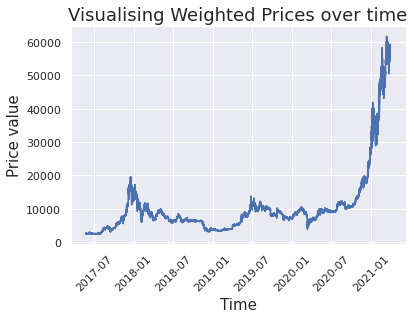

In [58]:
plt.plot(data)
plt.title('Visualising Weighted Prices over time',fontsize=18)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Price value',fontsize=15)
plt.xticks(rotation=45)
plt.show()

Normalising values using Standard Scaler

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data = sc.fit_transform(np.array(data).reshape(-1,1))

data[:5]

array([[-0.81740705],
       [-0.81702158],
       [-0.81564008],
       [-0.81532869],
       [-0.81525467]])

Splitting our data into training and testing

In [60]:
training_size = int(len(data)*0.75)

training_data = data[0:training_size,:]
testing_data = data[training_size:,:]

print(training_data.shape)
print(testing_data.shape)

(1451055, 1)
(483685, 1)


Arranging the data in such a way that the value of current day depends on the previous value.

* Here two lists are created for X and Y.The first value of the dataset is added in X and the second value is added in Y because our current prediction depends on the previous value i.e the timestamp here is 1.Now as the loop continues the second values is then appended in X and third value in Y and so on.Once we reach at the end of the loop the last value of X will be the second last value of our dataset and last value of Y will be the last value of our dataset.

In [61]:
def create_dataset(data,timestamp=1):
    X=[]
    Y=[]
    
    for i in range(len(data)-timestamp-1):
        a = data[i:(i+timestamp)]
        X.append(a)
        
        Y.append(data[i+timestamp])
        
    return np.array(X),np.array(Y)

In [62]:
timestamp=1
X_train,Y_train = create_dataset(training_data,timestamp)
x_test,y_test = create_dataset(testing_data,timestamp)

print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1451053, 1, 1)
(1451053, 1)
(483683, 1, 1)
(483683, 1)


In [63]:
print(X_train[:6])

print(Y_train[:6])

[[[-0.81740705]]

 [[-0.81702158]]

 [[-0.81564008]]

 [[-0.81532869]]

 [[-0.81525467]]

 [[-0.81507183]]]
[[-0.81702158]
 [-0.81564008]
 [-0.81532869]
 [-0.81525467]
 [-0.81507183]
 [-0.81504109]]


# Creating LSTM model for prediction

In [64]:
from tensorflow.keras import models
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [65]:
model = models.Sequential()

model.add(LSTM(50,return_sequences = True,input_shape = (5,1),activation='relu'))
model.add(LSTM(30,return_sequences = True))
model.add(LSTM(25,return_sequences = True))
model.add(LSTM(10,return_sequences = False))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 30)             9720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 25)             5600      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1440      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 27,171
Trainable params: 27,171
Non-trainable params: 0
_________________________________________________________________


# Training model

In [66]:
hist = model.fit(X_train,
                 Y_train,
                 epochs=5,
                 batch_size=32,
                 validation_split=0.25)

Epoch 1/5
34010/34010 [==============================] - 343s 10ms/step - loss: 0.0033 - val_loss: 1.8042e-06
Epoch 2/5
34010/34010 [==============================] - 333s 10ms/step - loss: 3.1008e-06 - val_loss: 3.2200e-06
Epoch 3/5
34010/34010 [==============================] - 331s 10ms/step - loss: 2.9882e-06 - val_loss: 3.0203e-06
Epoch 4/5
34010/34010 [==============================] - 331s 10ms/step - loss: 2.9875e-06 - val_loss: 1.2963e-06
Epoch 5/5
34010/34010 [==============================] - 326s 10ms/step - loss: 2.8963e-06 - val_loss: 5.2488e-06


In [67]:
hist.history

{'loss': [0.00046819134149700403,
  3.076320354011841e-06,
  2.992601821460994e-06,
  2.977496251332923e-06,
  2.875623749787337e-06],
 'val_loss': [1.804171461117221e-06,
  3.2199720862990944e-06,
  3.020262283826014e-06,
  1.2963478184246924e-06,
  5.248829438642133e-06]}

Visualising training and validation loss.

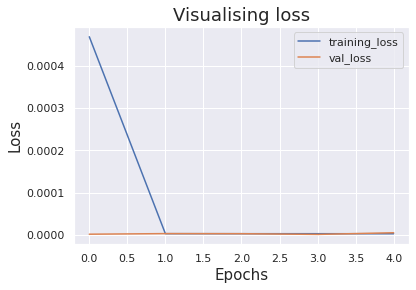

In [68]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss,label='training_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.title('Visualising loss',fontsize=18)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.show()

Making predictions on test data

In [69]:
predictions = model.predict(x_test)

Converting the predicted and original test values into their original form

In [70]:
y_test = sc.inverse_transform(y_test)
y_pred = sc.inverse_transform(predictions)

[]

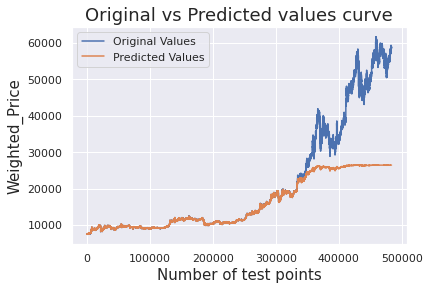

In [71]:
plt.plot(y_test,label='Original Values')
plt.plot(y_pred,label='Predicted Values')
plt.legend()
plt.title('Original vs Predicted values curve',fontsize=18)
plt.xlabel('Number of test points',fontsize=15)
plt.ylabel('Weighted_Price',fontsize=15)
plt.plot()

In [72]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
score

0.523389525855775

Here we can see both the curves have overlapped and the r2_score is almost 
1 which tells us that the model is able to generate good results.

Time series forecasting blog; https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/?fbclid=IwAR362uz9fbyINpiWR7wrqfKRqmazTiP2PEBu3CMKawE51vekBVWTVYTzEOQ

# Part 3;Using Autoregressive integrated moving average

ARIMA introduction; https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#:~:text=ARIMA%2C%20short%20for%20'Auto%20Regressive,used%20to%20forecast%20future%20values. 

In [73]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [74]:
# Load data
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

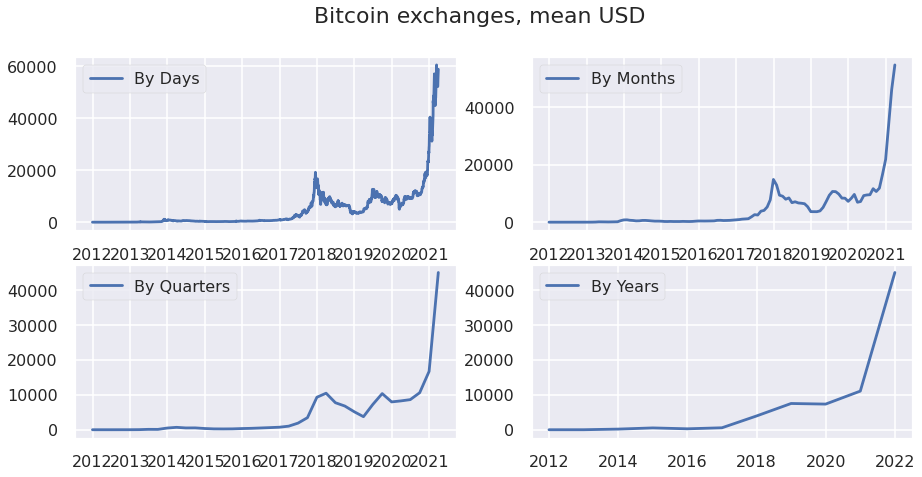

In [76]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.998863


<Figure size 1080x504 with 0 Axes>

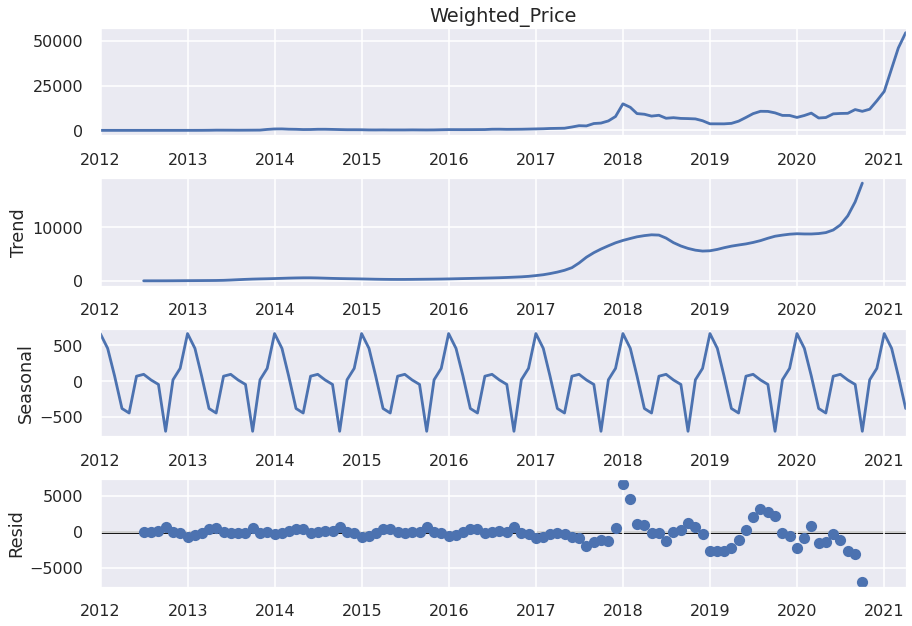

In [77]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()


Box-Cox Transformations

In [78]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.998863


The series are not stationary

In [79]:
#Seasonal differentiation

# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.444282


The series are not stationary.

Dickey–Fuller test: p=0.000024


<Figure size 1080x504 with 0 Axes>

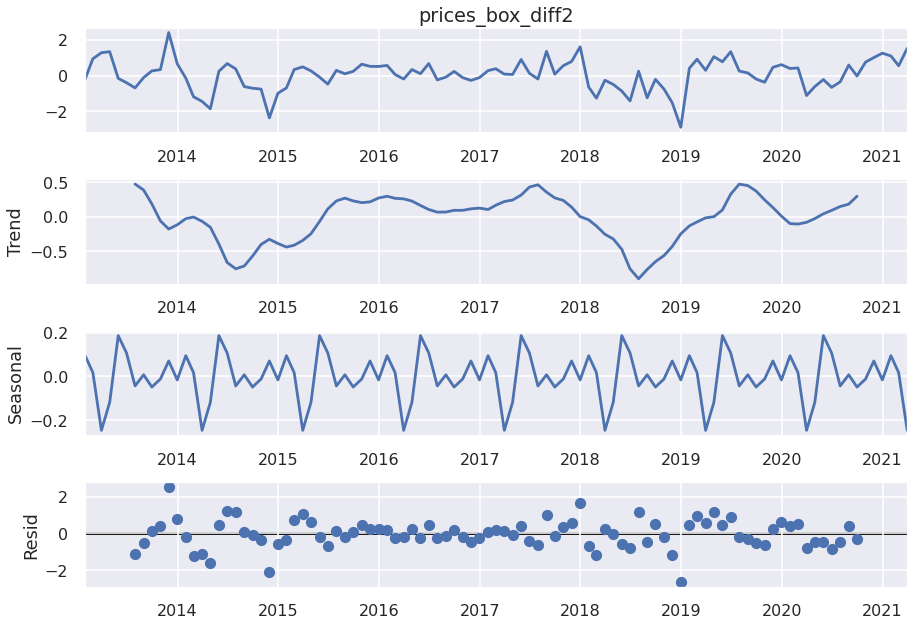

In [80]:
#Regular differentiation
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

In [ ]:
#The series are stationary.

# Model Selection

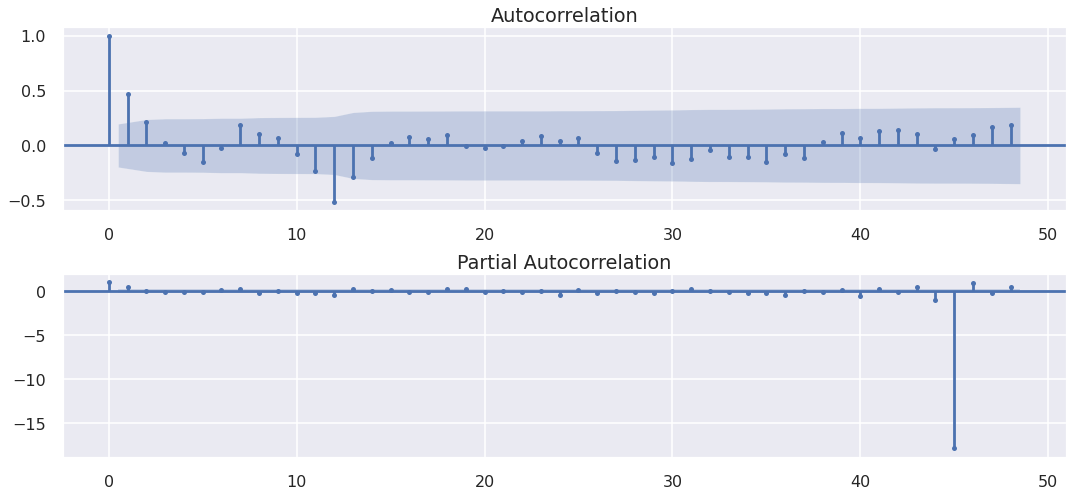

In [81]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [82]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [83]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  173.615967
21  (1, 0, 1, 1)  174.766385
25  (1, 1, 0, 1)  175.547047
37  (2, 0, 0, 1)  175.554167
7   (0, 1, 0, 1)  175.589199
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                  112
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -83.808
Date:                              Tue, 27 Apr 2021   AIC                            173.616
Time:                                      23:23:39   BIC                            181.401
Sample:                                  12-31-2011   HQIC                           176.766
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Analysis of residues

Dickey–Fuller test:: p=0.000000


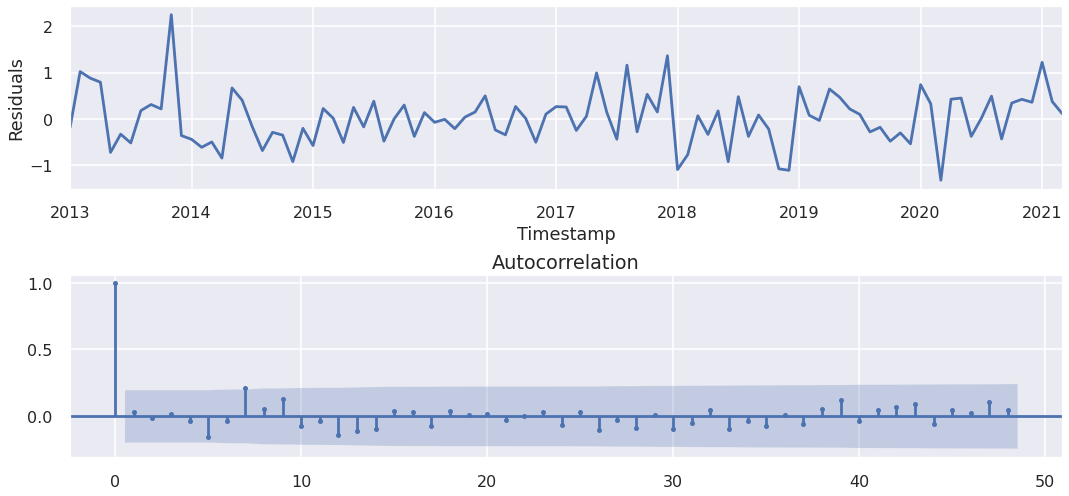

In [84]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [86]:
#Prediction

# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

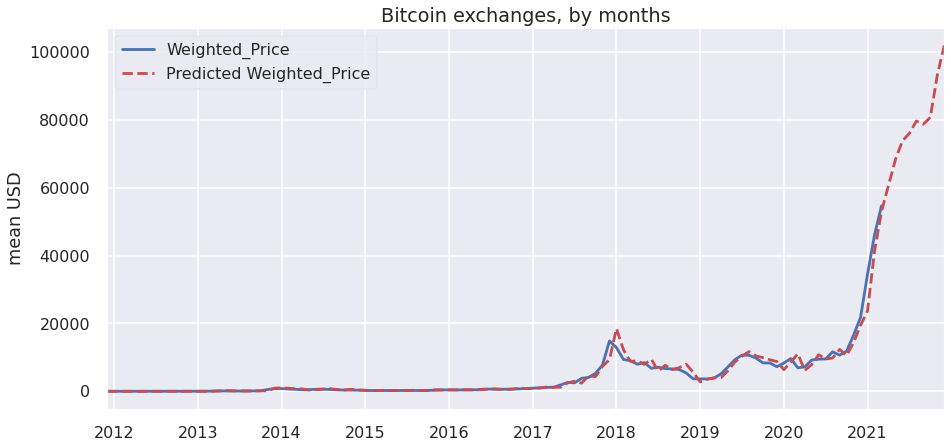

In [87]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2021, 4, 30), datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 31), 
             datetime(2021, 8 , 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
             datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=120), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()